# MNIST Handwritten Digit Recognition in Keras
In this notebook I will build a simple keras NN, and try live some hand digit recognition.

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from keras.datasets import mnist
import keras.utils as keras_utils
import matplotlib.pyplot as plt

In [125]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

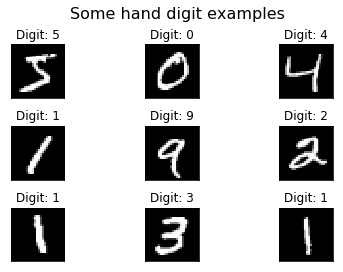

In [137]:
fig = plt.figure()
fig.suptitle("Some hand digit examples", size=16)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.subplots_adjust(top=0.85)
fig.show()

Prepare the data

In [138]:
num_classes = len(np.unique(y_test))

# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", x_test.shape)

# Prepare the training images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255

# Prepare the test images
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras_utils.to_categorical(y_train, num_classes)
y_test = keras_utils.to_categorical(y_test, num_classes)

# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000, 28, 28)
Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)


The code below is not used, it would be used if we had a folder with the pictures, but in this case we are using the keras dataset utility to get the training data

image_size = 28
data_generator = ImageDataGenerator(preprocess_input)

train_generator = data_generator.flow_from_directory(
                                        directory='../input/dogs-gone-sideways/images/train',
                                        target_size=(image_size, image_size),
                                        batch_size=10,
                                        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
                                        directory='../input/dogs-gone-sideways/images/val',
                                        target_size=(image_size, image_size),
                                        class_mode='categorical')

# fit_stats below saves some statistics describing how model fitting went
# the key role of the following line is how it changes my_new_model by fitting to data
fit_stats = my_new_model.fit_generator(train_generator,
                                       steps_per_epoch=22,
                                       validation_data=validation_generator,
                                       validation_steps=1)

### Build the model structure

In [139]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

In [141]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

### Train the model

In [142]:
fit_stats = model.fit(x_train, y_train,
          batch_size=128, epochs=5,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 130s - loss: 0.2326 - acc: 0.9292 - val_loss: 0.0507 - val_acc: 0.9843
Epoch 2/5
 - 133s - loss: 0.0831 - acc: 0.9750 - val_loss: 0.0345 - val_acc: 0.9882
Epoch 3/5
 - 130s - loss: 0.0608 - acc: 0.9811 - val_loss: 0.0311 - val_acc: 0.9905
Epoch 4/5
 - 127s - loss: 0.0501 - acc: 0.9847 - val_loss: 0.0311 - val_acc: 0.9893
Epoch 5/5
 - 127s - loss: 0.0417 - acc: 0.9864 - val_loss: 0.0313 - val_acc: 0.9898


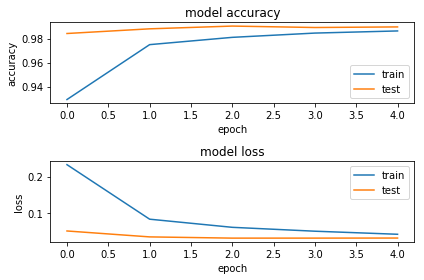

In [150]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(fit_stats.history['acc'])
plt.plot(fit_stats.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(fit_stats.history['loss'])
plt.plot(fit_stats.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
fig.show()

### Let's try the predictions

In [151]:
from IPython.display import HTML

To see inference in action, draw a digit in the image box below. The pixel data from your drawing will be loaded into a `data` variable in this notebook.

Note: after drawing the image, you'll need to move to the next notebook cell.

NOTE 2: this html at the moment works only in jupyther notebook, and do not work in jupyther lab

In [154]:
HTML(open("dnn_with_keras/input.html").read())

The digit you draw is '5' with confindece 1.0000


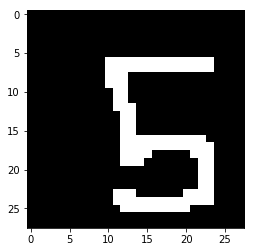

In [244]:
try: data
except NameError: raise Exception('The digit you wrote was not stored, please note that this works in jupyter notebook only (not in lab)')

test = np.reshape(data[0], 28*28, 1)
test = np.reshape(test, (28,28,1), 1)
test = np.expand_dims(test, axis=0)
response = model.predict(test)
# print('Raw prediction result:')
# print(response)

labeled_predictions = list(zip(range(10), response[0]))
# print('Labeled predictions: ')
# print(labeled_predictions)

labeled_predictions.sort(key=lambda label_and_prob: 1.0 - label_and_prob[1])
print("The digit you draw is '{}' with confindece {:.4f}".format(labeled_predictions[0][0], labeled_predictions[0][1]))

_=plt.imshow(data[0], cmap='gray', interpolation='none')